In [1]:
import  requests, pandas as pd, numpy as np, matplotlib.pyplot as plt
from  sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.layers import Dense, Dropout, LSTM
from tensorflow.python.keras.models import Sequential

In [2]:
api_key = ''
symbol ='GBP/USD'
interval = '5min'
order ='asc'
start_date = '2022-03-01 00:00:00'
end_date = '2022-04-14 00:00:00'
api_url =f'https://api.twelvedata.com/time_series?apikey={api_key}&interval={interval}&type=none&symbol={symbol}&start_date={start_date}&end_date={end_date}&format=JSON&order={order}'
data = requests.get(api_url).json()

#api_url = 'https://api.twelvedata.com/time_series?apikey={api_key}&interval={interval}&symbol={symbol}&start_date={start_date}&end_date={end_date}'
#data.keys()

In [3]:
data.keys()
data_final = pd.DataFrame(data['values'])
data_final

,datetime,open,high,low,close
0,2022-03-18 12:50:00,1.31380,1.31380,1.31230,1.31250
1,2022-03-18 12:55:00,1.31245,1.31270,1.31210,1.31240
2,2022-03-18 13:00:00,1.31260,1.31260,1.31220,1.31240
3,2022-03-18 13:05:00,1.31240,1.31255,1.31190,1.31195
4,2022-03-18 13:10:00,1.31195,1.31195,1.31150,1.31165
...,...,...,...,...,...
4995,2022-04-13 23:40:00,1.31215,1.31215,1.31195,1.31200
4996,2022-04-13 23:45:00,1.31210,1.31215,1.31195,1.31205
4997,2022-04-13 23:50:00,1.31210,1.31225,1.31200,1.31210
4998,2022-04-13 23:55:00,1.31220,1.31225,1.31185,1.31190


In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_final['close'].values.reshape(-1,1))
scaled_data

array([[0.47409733],
       [0.47095761],
       [0.47095761],
       ...,
       [0.46153846],
       [0.45525903],
       [0.4866562 ]])

In [5]:
time_interval_train = 24
prediction_interval = 12
x_train = []
y_train = []

In [6]:
import numpy as np
for i in range( time_interval_train, len(scaled_data)-prediction_interval):
    a = np.array(scaled_data[i-time_interval_train:i,0])
    x_train.append(a)
    np.array(x_train)
    b = np.array(scaled_data[i+prediction_interval,0])
    y_train.append(b)
    np.array(y_train)

    #list.append(x_train, scaled_data[i-time_interval_train:i,0],axis=0)
    #y_train.append(scaled_data[i+prediction_interval,0])
    #x_train = np.vstack(x_train)    
    #y_train = np.vstack(y_train)
    #x_train = np.array(x_train)
    #y_train = np.array(y_train)
    

In [7]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)





In [8]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [9]:
x_train.shape

(4964, 24, 1)

In [10]:
model =Sequential()
model.add(LSTM(128,return_sequences=True, input_shape = (x_train.shape[1],1),activation='relu'))
model.add(Dropout(0.4))
model.add(LSTM(64, return_sequences= True,activation='relu'))
model.add(Dropout(0.3))
model.add(LSTM(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1 , activation= 'sigmoid'))


In [11]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [12]:
model.fit(x_train,y_train, epochs=10,batch_size=64)

Epoch 1/10
78/78 [==============================] - 8s 45ms/step - loss: 0.0164 - accuracy: 4.0290e-04
Epoch 2/10
78/78 [==============================] - 3s 42ms/step - loss: 0.0036 - accuracy: 4.0290e-04
Epoch 3/10
78/78 [==============================] - 3s 43ms/step - loss: 0.0033 - accuracy: 4.0290e-04
Epoch 4/10
78/78 [==============================] - 3s 43ms/step - loss: 0.0032 - accuracy: 4.0290e-04
Epoch 5/10
78/78 [==============================] - 3s 42ms/step - loss: 0.0031 - accuracy: 4.0290e-04
Epoch 6/10
78/78 [==============================] - 3s 39ms/step - loss: 0.0029 - accuracy: 4.0290e-04
Epoch 7/10
78/78 [==============================] - 3s 39ms/step - loss: 0.0029 - accuracy: 4.0290e-04
Epoch 8/10
78/78 [==============================] - 3s 39ms/step - loss: 0.0029 - accuracy: 4.0290e-04
Epoch 9/10
78/78 [==============================] - 3s 39ms/step - loss: 0.0027 - accuracy: 4.0290e-04
Epoch 10/10
78/78 [==============================] - 3s 39ms/step - loss:

In [13]:
api_key = ''
symbol ='GBP/USD'
interval = '5min'
order ='asc'
start_date = '2022-04-16 00:00:00'
end_date = '2022-04-21 00:00:00'
api_url =f'https://api.twelvedata.com/time_series?apikey={api_key}&interval={interval}&type=none&symbol={symbol}&start_date={start_date}&end_date={end_date}&format=JSON&order={order}'
data_test = requests.get(api_url).json()
data_test.keys()
data_final_test = pd.DataFrame(data_test['values'])
data_final_test

,datetime,open,high,low,close
0,2022-04-15 12:00:00,1.30675,1.30710,1.30630,1.30700
1,2022-04-15 12:05:00,1.30675,1.30705,1.30655,1.30695
2,2022-04-15 12:10:00,1.30685,1.30715,1.30660,1.30690
3,2022-04-15 12:15:00,1.30710,1.30710,1.30670,1.30690
4,2022-04-15 12:20:00,1.30685,1.30705,1.30650,1.30660
...,...,...,...,...,...
765,2022-04-20 03:00:00,1.30300,1.30330,1.30295,1.30295
766,2022-04-20 03:05:00,1.30295,1.30345,1.30295,1.30340
767,2022-04-20 03:10:00,1.30325,1.30380,1.30310,1.30380
768,2022-04-20 03:15:00,1.30380,1.30395,1.30350,1.30370


In [14]:
GBPUSD_prices =pd.to_numeric(data_final_test['close'] , errors='coerce').values
test_inputs = data_final_test['close'].values
scaled_data_test = scaler.fit_transform(data_final_test['close'].values.reshape(-1,1))
model_inputs = scaled_data_test

In [15]:
model_inputs.shape

(770, 1)

In [16]:
x_test= []
import numpy as np
for x in range( time_interval_train, len(model_inputs)):
    a = np.array(model_inputs[x-time_interval_train:x,0])
    x_test.append(a)
    np.array(x_test)
    #b = np.array(scaled_data[i+prediction_interval,0])
    #y_train.append(b)
    #np.array(y_train)


    

In [17]:
x_test = np.asarray(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [48]:
len(x_test)

746

In [50]:
x_prediction = x_test[len(x_test)-time_interval_train:len(x_test),:,:]
x_prediction.shape

(24, 24, 1)

In [51]:
prediction_prices = model.predict(x_test)
prediction_prices =scaler.inverse_transform(prediction_prices)
prediction_prices

array([[1.3062023],
       [1.3062048],
       [1.3062088],
       [1.3062124],
       [1.3062136],
       [1.3062091],
       [1.3061991],
       [1.3061814],
       [1.3061519],
       [1.3061222],
       [1.3060924],
       [1.3060642],
       [1.3060392],
       [1.3060163],
       [1.3059946],
       [1.3059794],
       [1.3059678],
       [1.3059618],
       [1.3059598],
       [1.3059591],
       [1.3059599],
       [1.3059596],
       [1.3059574],
       [1.3059525],
       [1.3059458],
       [1.3059351],
       [1.3059229],
       [1.3059107],
       [1.3058977],
       [1.3058847],
       [1.305873 ],
       [1.3058612],
       [1.3058507],
       [1.305845 ],
       [1.3058424],
       [1.3058438],
       [1.3058484],
       [1.3058562],
       [1.3058673],
       [1.3058792],
       [1.3058915],
       [1.305904 ],
       [1.3059165],
       [1.3059309],
       [1.3059443],
       [1.3059576],
       [1.3059692],
       [1.3059794],
       [1.3059909],
       [1.3060017],


<function matplotlib.pyplot.show(close=None, block=None)>

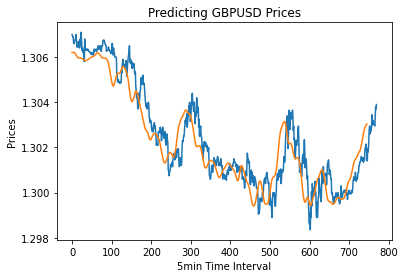

In [52]:
plt.plot( GBPUSD_prices , label = "GBPUSD Prices")
plt.plot(prediction_prices , label = "Predicted Prices")
plt.title("Predicting GBPUSD Prices")
plt.xlabel("5min Time Interval")
plt.ylabel("Prices")
plt.legend
plt.show

In [53]:
len(model_inputs)
model_inputs.shape
#last_data=[]

(770, 1)

In [54]:
x_final= []
import numpy as np
for y in range( 1, prediction_interval):
   c = np.array(model_inputs[(len(model_inputs)-time_interval_train-y):(len(model_inputs)-y),0])
   x_final.append(c)
   np.array(x_final)




In [ ]:
x_final = np.asarray(x_final)
x_final = np.reshape(x_final,(x_final.shape[0],x_final.shape[1],1))
#x_final = np.reshape(x_final , (1,x_final.shape[0],1))
prediction = model.predict(x_prediction)
prediction = scaler.inverse_transform(prediction)
prediction.shape
prediction



In [60]:
prediction_final= []
import numpy as np
for d in range( 1, len(prediction)):
   f = np.array(prediction[len(prediction)-d,0])
   prediction_final.append(f)
   np.array(prediction_final)

prediction_final

[array(1.3030334, dtype=float32),
 array(1.3029981, dtype=float32),
 array(1.3029711, dtype=float32),
 array(1.30295, dtype=float32),
 array(1.3029238, dtype=float32),
 array(1.3028841, dtype=float32),
 array(1.3028324, dtype=float32),
 array(1.3027672, dtype=float32),
 array(1.3026896, dtype=float32),
 array(1.3026006, dtype=float32),
 array(1.3025029, dtype=float32),
 array(1.3023992, dtype=float32),
 array(1.3022993, dtype=float32),
 array(1.3022016, dtype=float32),
 array(1.3021071, dtype=float32),
 array(1.3020209, dtype=float32),
 array(1.3019456, dtype=float32),
 array(1.3018854, dtype=float32),
 array(1.3018423, dtype=float32),
 array(1.3018125, dtype=float32),
 array(1.3017874, dtype=float32),
 array(1.30176, dtype=float32),
 array(1.3017278, dtype=float32)]

In [61]:
x_final = np.asarray(x_final)
x_final = np.reshape(x_final,(x_final.shape[0],x_final.shape[1],1))

<function matplotlib.pyplot.show(close=None, block=None)>

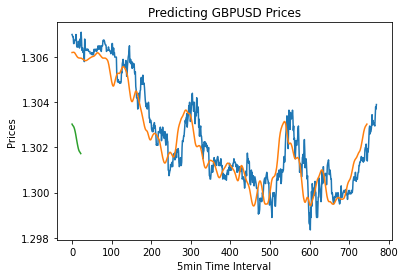

In [62]:
plt.plot( GBPUSD_prices , label = "GBPUSD Prices")
plt.plot(prediction_prices , label = "Predicted Prices")
plt.plot(prediction_final, label ="Forecast")
plt.title("Predicting GBPUSD Prices")
plt.xlabel("5min Time Interval")
plt.ylabel("Prices")
plt.legend
plt.show